# 第一阶段补充 🍰
温馨提示：在运行这个notebook
前，建议你先备份一份，以便对照输出是否在预期内。

此外，如果你遇到视频中某些参数和 jupyter notebook 不同的情况，请以后者为准，因为经过了最新迭代与勘误。

有时候版本更新可能会改变一些约定，若出错请你删除之前生成的任务文件，再重新运行相应的命令

工具类手册：

https://mmdetection.readthedocs.io/zh_CN/3.x/user_guides/useful_tools.html

更新时间：2023/01/17

In [1]:
# 新建一个文件夹专门用来放教程类产生的文件
import os
if not os.path.exists("MyTutorial2"):
    os.makedirs("MyTutorial2")

In [10]:
!git checkout --track origin/3.x
!git branch -a

fatal: 一个分支名 '3.x' 已经存在。
* 3.x
  master
  remotes/origin/3.x
  remotes/origin/HEAD -> origin/master
  remotes/origin/dev
  remotes/origin/dev-3.x
  remotes/origin/dev-3.x-pat-ci
  remotes/origin/dev-pat-ci
  remotes/origin/fix_pat_ci
  remotes/origin/master
  remotes/origin/refactor-detr
  remotes/origin/test-3.0.0rc0
  remotes/origin/yolov4
  remotes/upstream/3.x


In [13]:
# 确保当前在最新版！
!git pull origin 3.x
# 如果你clone的是自己fork的仓库，请添加远程仓库后再进行pull操作
# !git remote add upstream git@github.com:open-mmlab/mmdetection
# !git pull upstream 3.x

来自 github.com:open-mmlab/mmdetection
 * branch              3.x        -> FETCH_HEAD
已经是最新的。


## 如何利用好手册？

https://mmdetection.readthedocs.io/zh_CN/3.x/get_started.html

- 笨方法 通读
- 对照源码部分，遇到好奇的就去查
- 遇到不懂的 先全局查
- 以mmdet为例复习一遍看项目的方法，可以迁移到其他下游库
  - 步骤如下：
  1. 打开文档查看新手引导跑第一个demo
  2. 浏览不同文件夹
  3. 浏览config内有什么，看看对应模型
  4. 根据自己的需求查看对应类的内容和设计
- 通过反复查阅文档对照源码可以逐渐提高熟悉度

## Config错误怎么改？

再次复习结构：
https://mmengine.readthedocs.io/zh_CN/latest/advanced_tutorials/config.html#id3

In [ ]:
%%writefile ./MyTutorial2/my_error_config.py
_base_ = '../convnext/cascade-mask-rcnn_convnext-t-p4-w7_fpn_4conv1fc-giou_amp-ms-crop-3x_coco.py'

model = dict(
    roi_head=dict(
        bbox_head=dict(num_classes=7)))

Overwriting ./MyTutorial2/my_error_config.py


In [2]:
!python tools/misc/print_config.py ./MyTutorial2/my_error_config.py

Config:
model = dict(
    type='CascadeRCNN',
    data_preprocessor=dict(
        type='DetDataPreprocessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_mask=True,
        pad_size_divisor=32),
    backbone=dict(
        type='mmcls.ConvNeXt',
        arch='tiny',
        out_indices=[0, 1, 2, 3],
        drop_path_rate=0.4,
        layer_scale_init_value=1.0,
        gap_before_final_norm=False,
        init_cfg=dict(
            type='Pretrained',
            checkpoint=
            'https://download.openmmlab.com/mmclassification/v0/convnext/downstream/convnext-tiny_3rdparty_32xb128-noema_in1k_20220301-795e9634.pth',
            prefix='backbone.')),
    neck=dict(
        type='FPN',
        in_channels=[96, 192, 384, 768],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='

In [3]:
%%writefile ./MyTutorial2/my_error_config.py
_base_ = '../configs/convnext/cascade-mask-rcnn_convnext-t-p4-w7_fpn_4conv1fc-giou_amp-ms-crop-3x_coco.py'

model = dict(
    roi_head=dict(
        bbox_head=dict(num_classes=7)))

Overwriting ./MyTutorial2/my_error_config.py


In [4]:
!python tools/misc/print_config.py ./MyTutorial2/my_error_config.py

Traceback (most recent call last):
  File "tools/misc/print_config.py", line 60, in <module>
    main()
  File "tools/misc/print_config.py", line 35, in main
    cfg = Config.fromfile(args.config)
  File "/home/sanbu/anaconda3/envs/mmlab2/lib/python3.7/site-packages/mmengine/config/config.py", line 170, in fromfile
    use_predefined_variables)
  File "/home/sanbu/anaconda3/envs/mmlab2/lib/python3.7/site-packages/mmengine/config/config.py", line 471, in _file2dict
    cfg_dict = Config._merge_a_into_b(cfg_dict, base_cfg_dict)
  File "/home/sanbu/anaconda3/envs/mmlab2/lib/python3.7/site-packages/mmengine/config/config.py", line 674, in _merge_a_into_b
    b[k] = Config._merge_a_into_b(v, b[k], allow_list_keys)
  File "/home/sanbu/anaconda3/envs/mmlab2/lib/python3.7/site-packages/mmengine/config/config.py", line 674, in _merge_a_into_b
    b[k] = Config._merge_a_into_b(v, b[k], allow_list_keys)
  File "/home/sanbu/anaconda3/envs/mmlab2/lib/python3.7/site-packages/mmengine/config/config.p

In [12]:
%%writefile ./MyTutorial2/my_error_config.py
_base_ = '../configs/convnext/cascade-mask-rcnn_convnext-t-p4-w7_fpn_4conv1fc-giou_amp-ms-crop-3x_coco.py'

model = dict(
    roi_head=dict(bbox_head=[
        dict(num_classes=7),
        dict(num_classes=7),
        dict(num_classes=7)
    ]))


Overwriting ./MyTutorial2/my_error_config.py


In [ ]:
# 注意，根据config提示需要安装mmcls,先安装后再进行print_config打印
!mim install "mmcls==1.0.0rc3"

In [15]:
# 这次对了吗？
!python tools/misc/print_config.py ./MyTutorial2/my_error_config.py

Config:
model = dict(
    type='CascadeRCNN',
    data_preprocessor=dict(
        type='DetDataPreprocessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_mask=True,
        pad_size_divisor=32),
    backbone=dict(
        type='mmcls.ConvNeXt',
        arch='tiny',
        out_indices=[0, 1, 2, 3],
        drop_path_rate=0.4,
        layer_scale_init_value=1.0,
        gap_before_final_norm=False,
        init_cfg=dict(
            type='Pretrained',
            checkpoint=
            'https://download.openmmlab.com/mmclassification/v0/convnext/downstream/convnext-tiny_3rdparty_32xb128-noema_in1k_20220301-795e9634.pth',
            prefix='backbone.')),
    neck=dict(
        type='FPN',
        in_channels=[96, 192, 384, 768],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='

In [16]:
%%writefile ./MyTutorial2/my_error_config.py
# 除了完全复制一份，还有别的方法吗？？
# 让我们再次看看手册 https://mmengine.readthedocs.io/zh_CN/latest/advanced_tutorials/config.html
_base_ = '../configs/convnext/cascade-mask-rcnn_convnext-t-p4-w7_fpn_4conv1fc-giou_amp-ms-crop-3x_coco.py'

config_model = _base_.model
config_model.roi_head.bbox_head[0].num_classes = 7
config_model.roi_head.bbox_head[1].num_classes = 7
config_model.roi_head.bbox_head[2].num_classes = 7

Overwriting ./MyTutorial2/my_error_config.py


In [17]:
!python tools/misc/print_config.py ./MyTutorial2/my_error_config.py

Config:
model = dict(
    type='CascadeRCNN',
    data_preprocessor=dict(
        type='DetDataPreprocessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_mask=True,
        pad_size_divisor=32),
    backbone=dict(
        type='mmcls.ConvNeXt',
        arch='tiny',
        out_indices=[0, 1, 2, 3],
        drop_path_rate=0.4,
        layer_scale_init_value=1.0,
        gap_before_final_norm=False,
        init_cfg=dict(
            type='Pretrained',
            checkpoint=
            'https://download.openmmlab.com/mmclassification/v0/convnext/downstream/convnext-tiny_3rdparty_32xb128-noema_in1k_20220301-795e9634.pth',
            prefix='backbone.')),
    neck=dict(
        type='FPN',
        in_channels=[96, 192, 384, 768],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='

In [30]:
# 在命令行中愉快的浏览
# python tools/misc/print_config.py configs/_base_/models/cascade-mask-rcnn_r50_fpn.py |less

## 如何保存最好的模型？

https://mmengine.readthedocs.io/zh_CN/latest/tutorials/hook.html#checkpointhook

注释：你可能需要根据个人显存情况适当减少 batch_size 以及学习率等参数。

In [12]:
%%writefile MyTutorial2/best_model_config.py 
_base_ = '../configs/faster_rcnn/faster-rcnn_r50_fpn_1x_coco.py'

model = dict(
    roi_head=dict(
        bbox_head=dict(num_classes=7)))

data_root = 'data/mycoco/fish_voc2coco/my_coco/'
metainfo = {
    'classes': ('fish', 'jellyfish', 'penguin', 'puffin','shark','starfish','stingray'),
}
train_dataloader = dict(
    batch_size=1,
    dataset=dict(
        data_root=data_root,
        metainfo=metainfo,
        ann_file='train/train.json',
        data_prefix=dict(img='train/')))
val_dataloader = dict(
    dataset=dict(
        data_root=data_root,
        metainfo=metainfo,
        ann_file='val/val.json',
        data_prefix=dict(img='val/')))
test_dataloader = val_dataloader

val_evaluator = dict(ann_file=data_root + 'val/val.json')
test_evaluator = val_evaluator

train_cfg = dict(type='EpochBasedTrainLoop',max_epochs=3, val_interval=1)

optim_wrapper = dict(
    optimizer=dict(type='SGD', lr=0.02/5, momentum=0.9, weight_decay=0.0001))

default_hooks = dict(checkpoint=dict(type='CheckpointHook', save_best='auto'))

work_dir = './MyTutorial2/my_coco_train'

Overwriting MyTutorial2/best_model_config.py


In [14]:
!python tools/train.py MyTutorial2/best_model_config.py 

01/17 11:26:56 - mmengine - WARNING - The "log_processor" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.
01/17 11:26:56 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.15 (default, Nov 24 2022, 21:12:53) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 746242841
    GPU 0: NVIDIA GeForce GTX 1060
    CUDA_HOME: /usr/local/cuda-12
    NVCC: Cuda compilation tools, release 12.0, V12.0.76
    GCC: gcc (Ubuntu 11.3.0-1ubuntu1~22.04) 11.3.0
    PyTorch: 1.13.1+cu117
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)

#### 小作业一 🍵

请你根据checkpoint的文档

https://mmengine.readthedocs.io/zh_CN/latest/tutorials/hook.html#checkpointhook

自己尝试修改CheckpointHook参数或在自己的config中加入，看看是否能达到预期的结果。

注：因为考虑到测试机显存极少故选用 batch_size = 1，你可以根据自己的条件自行更换

## tools的其他常用工具作用

https://mmdetection.readthedocs.io/zh_CN/3.x/user_guides/index.html
### 结果分析



In [2]:
# 先生成测试结果
!python tools/test.py \
    MyTutorial2/best_model_config.py \
    MyTutorial2/my_coco_train/best_coco/bbox_mAP_epoch_3.pth \
    --work-dir MyTutorial2/pkl_result \
    --out ./MyTutorial2/pkl_result/my_coco_test.pkl

01/17 14:20:36 - mmengine - WARNING - The "log_processor" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.
01/17 14:20:36 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.15 (default, Nov 24 2022, 21:12:53) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 371630653
    GPU 0: NVIDIA GeForce GTX 1060
    CUDA_HOME: /usr/local/cuda-12
    NVCC: Cuda compilation tools, release 12.0, V12.0.76
    GCC: gcc (Ubuntu 11.3.0-1ubuntu1~22.04) 11.3.0
    PyTorch: 1.13.1+cu117
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)

In [4]:
from mmengine.fileio import load
outputs = load("MyTutorial2/pkl_result/my_coco_test.pkl")
print(outputs[0])

{'batch_input_shape': (800, 800), 'pad_shape': (800, 800), 'ori_shape': (640, 640), 'img_shape': (800, 800), 'scale_factor': (1.25, 1.25), 'img_id': 20190000001, 'img_path': 'data/mycoco/fish_voc2coco/my_coco/val/IMG_2520_jpeg_jpg.rf.1ed31d5ce368286ceef6589927435ad2.jpg', 'ignored_instances': {'labels': tensor([], dtype=torch.int64), 'bboxes': tensor([], size=(0, 4))}, 'pred_instances': {'scores': tensor([0.9630, 0.4735, 0.3725, 0.3591, 0.2208, 0.1972, 0.0916, 0.0610]), 'labels': tensor([3, 3, 3, 6, 3, 0, 0, 2]), 'bboxes': tensor([[ 97.0907, 211.9175, 293.3226, 321.8648],
        [494.4349,  30.4438, 537.4179,  69.5399],
        [429.4088, 180.0344, 460.8889, 219.4537],
        [141.1080, 394.9896, 417.3329, 509.3973],
        [148.8051, 392.5140, 456.6224, 511.4549],
        [ 98.1518, 211.1956, 290.2592, 355.7669],
        [104.5024, 208.5505, 167.5989, 241.8655],
        [ 84.1330, 213.6839, 300.3295, 328.5010]])}, 'gt_instances': {'labels': tensor([3]), 'bboxes': tensor([[107., 199

In [5]:
!python tools/analysis_tools/analyze_results.py \
      MyTutorial2/best_model_config.py \
      MyTutorial2/pkl_result/my_coco_test.pkl \
      MyTutorial2/analyze_results

01/17 14:31:20 - mmengine - WARNING - The "transform" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.
01/17 14:31:20 - mmengine - WARNING - The "dataset" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
01/17 14:31:20 - mmengine - WARNING - The "log_processor" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.
01/17 14:31:20 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.15 (default, Nov 24 2022, 21:12:53) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 1996166121
    GPU 0: NVIDIA GeForce GTX 1060
    CUDA_HOME: /usr/local/cuda-12
    NVCC: Cuda compilation tools, release 12.0, V12.0.76
    GCC: gcc (Ubuntu 11.3.0-1ubuntu1~2

In [6]:
!ls MyTutorial2/analyze_results/
# good & bad

20230117_143120  bad  best_model_config.py  good


#### 小作业二 🍵

请你根据结果分析的文档

https://mmdetection.readthedocs.io/zh_CN/3.x/user_guides/useful_tools.html#id2

自己尝试在终端中修改参数命令并查看展示结果，看看会有什么变化~

### 误差分析

什么是 coco_error_analysis ？
- https://cocodataset.org/#detection-eval
- https://blog.csdn.net/u014734886/article/details/78831884/

![precision recall](https://img-blog.csdn.net/20171218220650619)

C75: IoU设置为0.75时的PR曲线。      
C50: IoU设置为0.5时的PR曲线。   
Loc: IoU设置为0.1时的PR曲线。Loc与C50之间的色区域面积越大，表示越多的检测框位置不够精准。   

Sim: 特殊的PR曲线：Loc的基础上，如果检测框与真值框的类别不相同，但两者同属于一个亚类，则不认为该检测框是错误的。
Sim与Loc之间区域面积越大，表示子类间的混淆程度越高。VOC格式的数据集所有的类别都属于同一个亚类。

Oth: 特殊的PR曲线：Sim的基础上，如果检测框与真值框的亚类不相同，则不认为该检测框是错误的。
Oth与Sim之间区域面积越大，表示亚类间的混淆程度越高。VOC格式的数据集中所有的类别都属于同一个亚类，不存在亚类间的混淆。

BG: 特殊的PR曲线：在Oth的基础上，不认为背景区域的检测框是错的。BG与Oth之间面积越大，表示背景区域被误检的数量越多。

FN: 在BG的基础上，把漏检也视作正确的PR曲线。FN与BG之间面积越大，表示漏检的真值框数量越多。

可参考论文：    

Diagnosing Error in Object Detectors 

In [7]:
%%writefile MyTutorial2/json_output_config.py 
_base_ = "./best_model_config.py"

val_evaluator=dict(format_only=True, outfile_prefix='./MyTutorial2/error_results/val_result')
test_evaluator = val_evaluator

Writing MyTutorial2/json_output_config.py


In [8]:
# 生成 json 文件
!python tools/test.py \
    MyTutorial2/json_output_config.py \
    MyTutorial2/my_coco_train/best_coco/bbox_mAP_epoch_3.pth \
    --work-dir MyTutorial2/error_results

01/17 14:35:56 - mmengine - WARNING - The "log_processor" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.
01/17 14:35:56 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.15 (default, Nov 24 2022, 21:12:53) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 765036881
    GPU 0: NVIDIA GeForce GTX 1060
    CUDA_HOME: /usr/local/cuda-12
    NVCC: Cuda compilation tools, release 12.0, V12.0.76
    GCC: gcc (Ubuntu 11.3.0-1ubuntu1~22.04) 11.3.0
    PyTorch: 1.13.1+cu117
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)

In [9]:
# 得到每一类的 COCO bbox 误差结果，并保存分析结果图像至指定目录。
!python tools/analysis_tools/coco_error_analysis.py \
       MyTutorial2/error_results/val_result.bbox.json \
       MyTutorial2/error_results \
       --ann=data/mycoco/fish_voc2coco/my_coco/annotations/val.json

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.07s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.61s).
Accumulating evaluation results...
DONE (t=0.08s).
--------------analyzing 1-fish---------------
--------------analyzing 2-jellyfish---------------
--------------analyzing 3-penguin---------------
--------------analyzing 4-puffin---------------
--------------analyzing 5-shark---------------
--------------analyzing 6-starfish---------------
creating index...
index created!
--------------analyzing 7-stingray---------------
creating index...
index created!
creating index...
index created!
creating index...
index created!
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
Running per image evaluation...
Evaluate annotation type *bbox*
Running per image evaluation...
Evaluate annotation type *bbox*
creatin

In [1]:
!ls "MyTutorial2/error_results/bbox"

bbox-allclass-allarea.png   bbox-jellyfish-small.png  bbox-shark-medium.png
bbox-allclass-large.png     bbox-penguin-allarea.png  bbox-shark-small.png
bbox-allclass-medium.png    bbox-penguin-large.png    bbox-starfish-allarea.png
bbox-allclass-small.png     bbox-penguin-medium.png   bbox-starfish-large.png
bbox-fish-allarea.png	    bbox-penguin-small.png    bbox-starfish-medium.png
bbox-fish-large.png	    bbox-puffin-allarea.png   bbox-starfish-small.png
bbox-fish-medium.png	    bbox-puffin-large.png     bbox-stingray-allarea.png
bbox-fish-small.png	    bbox-puffin-medium.png    bbox-stingray-large.png
bbox-jellyfish-allarea.png  bbox-puffin-small.png     bbox-stingray-medium.png
bbox-jellyfish-large.png    bbox-shark-allarea.png    bbox-stingray-small.png
bbox-jellyfish-medium.png   bbox-shark-large.png


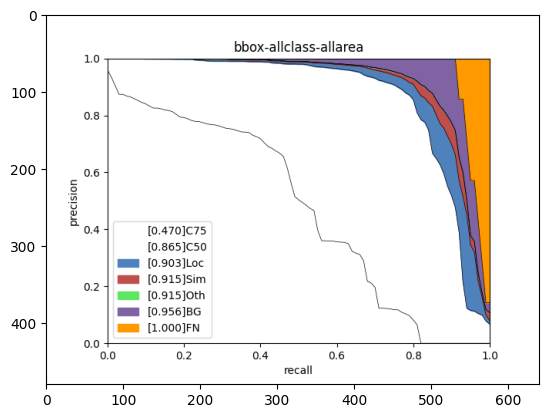

In [2]:
from matplotlib import pyplot as plt
img = plt.imread("MyTutorial2/error_results/bbox/bbox-allclass-allarea.png")
plt.imshow(img)

### MMDetection-TorchServe
#### docker安装

先来安装docker
- https://yeasy.gitbook.io/docker_practice/install/ubuntu
- https://yeasy.gitbook.io/docker_practice/install/windows

注：如果ubuntu运行中遇到只能sudo启动docker问题，可自行搜索newgroup相关解决方案


In [3]:
# 安装依赖
! pip install torch-model-archiver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 kB 44.0 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=6f30a97c4c18529e92c29483ee2b52826ac55d0acdbc43c2bbdb0e04b312d93c
  Stored in directory: /home/sanbu/.cache/pip/wheels/3e/3c/b4/7132d27620dd551cf00823f798a7190e7320ae7ffb71d1e989
Successfully built future


简单安装docker可参考如下教程：  
https://yeasy.gitbook.io/docker_practice/install

使docker能够避免输入sudo（通过 docker info检查是否要sudo才可输出）:         
https://www.yisu.com/zixun/139260.html

#### 也许需要修改dockerfile（以及解锁换源）
- nvidia

RUN rm /etc/apt/sources.list.d/cuda.list
RUN rm /etc/apt/sources.list.d/nvidia-ml.list
RUN  apt-get update \
  && apt-get install -y wget \
  && rm -rf /var/lib/apt/lists/*

- Avoid Public GPG key error
- https://github.com/NVIDIA/nvidia-docker/issues/1631

RUN apt-key del 7fa2af80
RUN apt-get update && apt-get install -y --no-install-recommends wget
RUN wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-keyring_1.0-1_all.deb
RUN dpkg -i cuda-keyring_1.0-1_all.deb

- docker换源（拉镜像极大加速）

[https://blog.51cto.com/u_13281972/2997681](https://blog.51cto.com/u_13281972/2997681)

你可以使用下面的dockerfile替换docker/serve/Dockerfile

```docker
ARG PYTORCH="1.9.0"
ARG CUDA="11.1"
ARG CUDNN="8"
FROM pytorch/pytorch:${PYTORCH}-cuda${CUDA}-cudnn${CUDNN}-devel

ARG MMCV="2.0.0rc1"
ARG MMDET="3.0.0rc5"

ENV PYTHONUNBUFFERED TRUE

RUN rm /etc/apt/sources.list.d/cuda.list
RUN rm /etc/apt/sources.list.d/nvidia-ml.list
RUN  apt-get update \
  && apt-get install -y wget \
  && rm -rf /var/lib/apt/lists/*

# Avoid Public GPG key error
# https://github.com/NVIDIA/nvidia-docker/issues/1631

RUN apt-key del 7fa2af80
RUN apt-get update && apt-get install -y --no-install-recommends wget
RUN wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-keyring_1.0-1_all.deb
RUN dpkg -i cuda-keyring_1.0-1_all.deb

# (Optional, use Mirror to speed up downloads)
# RUN sed -i 's/http:\/\/archive.ubuntu.com\/ubuntu\//http:\/\/mirrors.aliyun.com\/ubuntu\//g' /etc/apt/sources.list

# Install the required packages
RUN apt-get update && \
    DEBIAN_FRONTEND=noninteractive apt-get install --no-install-recommends -y \
    ca-certificates \
    g++ \
    openjdk-11-jre-headless \
    # MMDet Requirements
    ffmpeg libsm6 libxext6 git ninja-build libglib2.0-0 libsm6 libxrender-dev libxext6 \
    && rm -rf /var/lib/apt/lists/*

ENV PATH="/opt/conda/bin:$PATH" \
    FORCE_CUDA="1"

# TORCHSEVER
RUN pip install torchserve torch-model-archiver  nvgpu -i https://pypi.mirrors.ustc.edu.cn/simple/ 

# MMLAB
ARG PYTORCH
ARG CUDA
RUN pip install mmengine -i https://pypi.mirrors.ustc.edu.cn/simple/ 
RUN ["/bin/bash", "-c", "pip install mmcv==${MMCV} -f https://download.openmmlab.com/mmcv/dist/cu${CUDA//./}/torch${PYTORCH}/index.html"]
RUN pip install mmdet==${MMDET} -i https://pypi.mirrors.ustc.edu.cn/simple/ 

RUN useradd -m model-server \
    && mkdir -p /home/model-server/tmp

COPY entrypoint.sh /usr/local/bin/entrypoint.sh

RUN chmod +x /usr/local/bin/entrypoint.sh \
    && chown -R model-server /home/model-server

COPY config.properties /home/model-server/config.properties
RUN mkdir /home/model-server/model-store && chown -R model-server /home/model-server/model-store

EXPOSE 8080 8081 8082

USER model-server
WORKDIR /home/model-server
ENV TEMP=/home/model-server/tmp
ENTRYPOINT ["/usr/local/bin/entrypoint.sh"]
CMD ["serve"]

```

In [15]:
# 把 MMDetection 模型转换至 TorchServe
!python tools/deployment/mmdet2torchserve.py \
    MyTutorial2/my_coco_train/best_model_config.py \
    MyTutorial2/my_coco_train/best_coco/bbox_mAP_epoch_3.pth \
    --output-folder /data/GITHUB_OPEN_SOURCE/mmdetection/MyTutorial2/torchserve --model-name my_fish  # 绝对路径 与模型名字

In [20]:
# 构建 mmdet-serve docker 映像
!docker build -t mmdet-serve:latest docker/serve/

Sending build context to Docker daemon  6.144kB
Step 1/33 : ARG PYTORCH="1.9.0"
Step 2/33 : ARG CUDA="11.1"
Step 3/33 : ARG CUDNN="8"
Step 4/33 : FROM pytorch/pytorch:${PYTORCH}-cuda${CUDA}-cudnn${CUDNN}-devel
 ---> c35f519fe286
Step 5/33 : ARG MMCV="2.0.0rc1"
 ---> Using cache
 ---> 44cd7399886e
Step 6/33 : ARG MMDET="3.0.0rc5"
 ---> Using cache
 ---> 57a1ad7d904d
Step 7/33 : ENV PYTHONUNBUFFERED TRUE
 ---> Using cache
 ---> 5252602c5b72
Step 8/33 : RUN rm /etc/apt/sources.list.d/cuda.list
 ---> Using cache
 ---> 3dfdc0126fb4
Step 9/33 : RUN rm /etc/apt/sources.list.d/nvidia-ml.list
 ---> Using cache
 ---> dca27793f8e4
Step 10/33 : RUN  apt-get update   && apt-get install -y wget   && rm -rf /var/lib/apt/lists/*
 ---> Using cache
 ---> 375b03b9bee9
Step 11/33 : RUN apt-key del 7fa2af80
 ---> Using cache
 ---> 411a6bb8c8aa
Step 12/33 : RUN apt-get update && apt-get install -y --no-install-recommends wget
 ---> Using cache
 ---> 6cd12ed51e3c
Step 13/33 : RUN wget https://developer.downl

In [2]:
# 运行 mmdet-serve
!docker run --rm \
--gpus 1 \
--cpus 8 \
-p8080:8080 -p8081:8081 -p8082:8082 \
--mount type=bind,source=/data/GITHUB_OPEN_SOURCE/mmdetection/MyTutorial2/torchserve,target=/home/model-server/model-store \
mmdet-serve:latest

2023-01-10T13:44:28,720 [INFO ] main org.pytorch.serve.servingsdk.impl.PluginsManager - Initializing plugins manager...
2023-01-10T13:44:29,316 [INFO ] main org.pytorch.serve.ModelServer - 
Torchserve version: 0.7.0
TS Home: /opt/conda/lib/python3.7/site-packages
Current directory: /home/model-server
Temp directory: /home/model-server/tmp
Metrics config path: /opt/conda/lib/python3.7/site-packages/ts/configs/metrics.yaml
Number of GPUs: 1
Number of CPUs: 8
Max heap size: 3986 M
Python executable: /opt/conda/bin/python
Config file: /home/model-server/config.properties
Inference address: http://0.0.0.0:8080
Management address: http://0.0.0.0:8081
Metrics address: http://0.0.0.0:8082
Model Store: /home/model-server/model-store
Initial Models: all
Log dir: /home/model-server/logs
Metrics dir: /home/model-server/logs
Netty threads: 0
Netty client threads: 0
Default workers per model: 1
Blacklist Regex: N/A
Maximum Response Size: 6553500
Maximum Request Size: 6553500
Limit Maximum Image Pixe

如果在启动后发现提示`docker: Error response from daemon: could not select device driver ““ with capabilities: [[gpu]]`可按照下列方式操作安装nvidia-container-toolkit（或是直接看我下面写的那几个）

https://blog.csdn.net/weixin_44966641/article/details/123760614

一、设置稳定版本的库及GPG密钥
```bash
distribution=$(. /etc/os-release;echo $ID$VERSION_ID) 
   && curl -s -L https://nvidia.github.io/nvidia-docker/gpgkey | sudo apt-key add - 
   && curl -s -L https://nvidia.github.io/nvidia-docker/$distribution/nvidia-docker.list | sudo tee /etc/apt/sources.list.d/nvidia-docker.list
```
Optional：如果想要使用实验特性，需要加入experimental分支到库下：
```bash
curl -s -L https://nvidia.github.io/nvidia-container-runtime/experimental/$distribution/nvidia-container-runtime.list | sudo tee /etc/apt/sources.list.d/nvidia-container-runtime.list
```
更新好包列表之后，安装nvidia-docker2包及其依赖：
```bash
sudo apt-get update
sudo apt-get install -y nvidia-docker2
```



In [3]:
# 停止所有开着的docker(你也可以在vscode操作)
!docker stop $(docker ps -a -q)

bd897b9748e0
eb8dafb1e938


In [3]:
!docker ps

CONTAINER ID   IMAGE                COMMAND                  CREATED          STATUS          PORTS                                                           NAMES
ad46ce001652   mmdet-serve:latest   "/usr/local/bin/entr…"   41 seconds ago   Up 38 seconds   0.0.0.0:8080-8082->8080-8082/tcp, :::8080-8082->8080-8082/tcp   amazing_merkle


In [4]:
# 服务状态检查
!curl http://localhost:8080/ping

{
  "status": "Healthy"
}


In [5]:
# 更多 api https://pytorch.org/serve/inference_api.html
# 检查已注册模型
!curl "http://localhost:8081/models"

{
  "models": [
    {
      "modelName": "my_fish",
      "modelUrl": "my_fish.mar"
    }
  ]
}


In [6]:
!curl http://localhost:8080/predictions/my_fish   \
    -T data/mycoco/fish_voc2coco/my_coco/test/IMG_2275_jpeg_jpg.rf.ed3b7839b55e4ffb9601eadf849f3cd6.jpg

[
  {
    "class_label": 0,
    "class_name": "fish",
    "bbox": [
      479.3102111816406,
      293.5497131347656,
      640.0,
      394.5141296386719
    ],
    "score": 0.9959458708763123
  },
  {
    "class_label": 0,
    "class_name": "fish",
    "bbox": [
      448.4310607910156,
      214.1638641357422,
      640.0,
      304.8792419433594
    ],
    "score": 0.9945154786109924
  },
  {
    "class_label": 0,
    "class_name": "fish",
    "bbox": [
      319.8954162597656,
      594.2062377929688,
      638.0133666992188,
      640.0
    ],
    "score": 0.9900069236755371
  },
  {
    "class_label": 0,
    "class_name": "fish",
    "bbox": [
      1.597686767578125,
      430.5599670410156,
      168.0608367919922,
      547.8934936523438
    ],
    "score": 0.9828507900238037
  },
  {
    "class_label": 0,
    "class_name": "fish",
    "bbox": [
      30.713245391845703,
      273.1885070800781,
      437.5081481933594,
      401.73431396484375
    ],
    "score": 0.968064606

In [7]:
# 可视化torchserver的服务效果
!python tools/deployment/test_torchserver.py \
  data/mycoco/fish_voc2coco/my_coco/test/IMG_2275_jpeg_jpg.rf.ed3b7839b55e4ffb9601eadf849f3cd6.jpg \
  MyTutorial2/my_coco_train/best_model_config.py \
  MyTutorial2/my_coco_train/best_coco/bbox_mAP_epoch_3.pth \
  my_fish \
  --work-dir MyTutorial2


01/17 16:38:37 - mmengine - WARNING - The "model" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.
01/17 16:38:37 - mmengine - WARNING - The "task util" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.
Loads checkpoint by local backend from path: MyTutorial2/my_coco_train/best_coco/bbox_mAP_epoch_3.pth
01/17 16:38:38 - mmengine - WARNING - The "dataset" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.
01/17 16:38:38 - mmengine - WARNING - The "transform" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.
01/17 16:38:41 - mmengine - WARNING - The "visualizer" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.
/data/sanbu/anaconda3/envs/mmdet/lib/python3.7/site-packages/mmengine/visualization/visualize

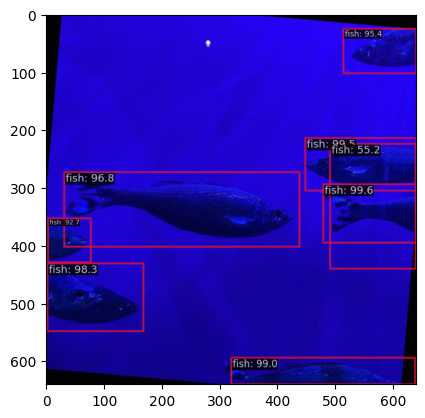

In [26]:
# 查看检测结果
from matplotlib import pyplot as plt  
img = plt.imread("MyTutorial2/torchserve_result.png")
plt.imshow(img)

#### 小作业三 ☕

请你根据上述过程，

将部署模型替换成自定义数据集所训练的模型，或者使用添加方式增加自己的新模型，

试试看走通全流程，加油~



## 修改可视化器绘制效果

01/17 15:58:34 - mmengine - WARNING - The "model" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.
01/17 15:58:35 - mmengine - WARNING - The "task util" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.
Loads checkpoint by local backend from path: MyTutorial2/my_coco_train/best_coco/bbox_mAP_epoch_3.pth
01/17 15:58:35 - mmengine - WARNING - The "dataset" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.
01/17 15:58:35 - mmengine - WARNING - The "transform" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.


/data/sanbu/anaconda3/envs/mmdet/lib/python3.7/site-packages/mmengine/visualization/visualizer.py:170: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '


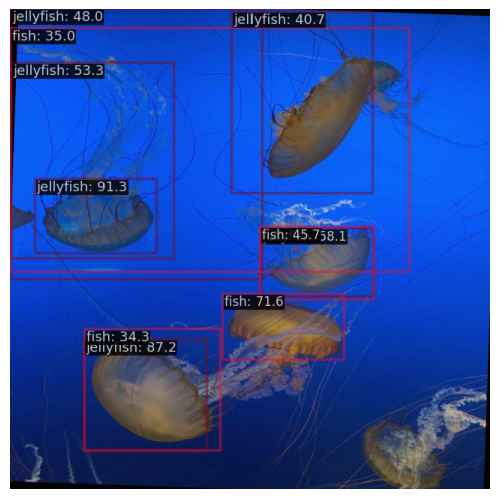

In [10]:
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
import mmcv
register_all_modules()
config_file = 'MyTutorial2/best_model_config.py'
checkpoint_file = 'MyTutorial2/my_coco_train/best_coco/bbox_mAP_epoch_3.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cuda:0'

image = mmcv.imread( "data/mycoco/fish_voc2coco/my_coco/test/IMG_2576_jpeg_jpg.rf.22cfa500e32e9cb1427cf02ec22dd566.jpg")
image = mmcv.imconvert(image,'bgr','rgb')
result = inference_detector(model, image)

# 为方便举例，直接引入本地可视化器
from mmdet.visualization import DetLocalVisualizer
visualizer = DetLocalVisualizer(
    vis_backends=[dict(type='LocalVisBackend')],
    save_dir=None,
    alpha= 0.5)

visualizer.dataset_meta = model.dataset_meta

visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    show=None,
    wait_time=0,
)
visualizer.show()

01/17 16:41:16 - mmengine - WARNING - The "model" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.
01/17 16:41:17 - mmengine - WARNING - The "task util" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.
Loads checkpoint by local backend from path: MyTutorial2/my_coco_train/best_coco/bbox_mAP_epoch_3.pth
01/17 16:41:17 - mmengine - WARNING - The "dataset" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.
01/17 16:41:17 - mmengine - WARNING - The "transform" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.


/data/sanbu/anaconda3/envs/mmdet/lib/python3.7/site-packages/mmengine/visualization/visualizer.py:170: UserWarning: `Visualizer` backend is not initialized because save_dir is None.
  warnings.warn('`Visualizer` backend is not initialized '


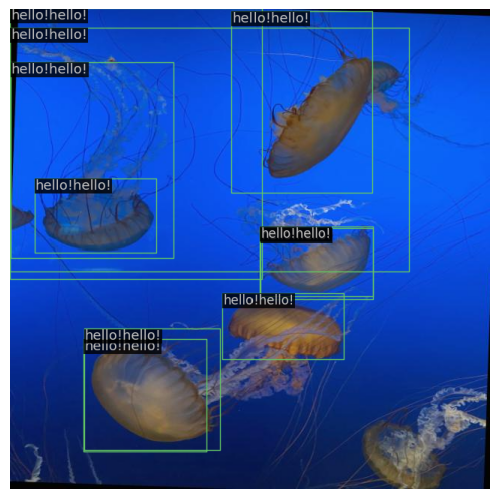

In [1]:
# 记得重启jupyter notebook
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
import mmcv
register_all_modules()
config_file = 'MyTutorial2/best_model_config.py'
checkpoint_file = 'MyTutorial2/my_coco_train/best_coco/bbox_mAP_epoch_3.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cuda:0'

image = mmcv.imread( "data/mycoco/fish_voc2coco/my_coco/test/IMG_2576_jpeg_jpg.rf.22cfa500e32e9cb1427cf02ec22dd566.jpg")
image = mmcv.imconvert(image,'bgr','rgb')
result = inference_detector(model, image)

from mmdet.visualization import DetLocalVisualizer
visualizer = DetLocalVisualizer(
    vis_backends=[dict(type='LocalVisBackend')],
    save_dir=None,
    alpha= 1,
    line_width=1,
    bbox_color=(100,200,100))

visualizer.dataset_meta = model.dataset_meta

visualizer.add_datasample(
    'result',
    image,
    data_sample=result,
    draw_gt = None,
    show=None,
    wait_time=0,
)
visualizer.show()

In [7]:
# 改完后别忘了恢复 local_visualizer 到原来的参数!

## 恢复训练的方法

https://mmengine.readthedocs.io/zh_CN/latest/examples/resume_training.html

如果只设置了 load_from 而没有设置 resume=True，则只会加载 checkpoint 中的权重并重新开始训练，而不是接着之前的状态继续训练。

In [8]:
%%writefile ./MyTutorial2/resume_model_config.py
_base_ = '../configs/faster_rcnn/faster-rcnn_r50_fpn_1x_coco.py'


model = dict(
    roi_head=dict(
        bbox_head=dict(num_classes=7)))

data_root = 'data/mycoco/fish_voc2coco/my_coco/'
metainfo = {
    'classes': ('fish', 'jellyfish', 'penguin', 'puffin','shark','starfish','stingray'),
}
train_dataloader = dict(
    batch_size=1,
    dataset=dict(
        data_root=data_root,
        metainfo=metainfo,
        ann_file='train/train.json',
        data_prefix=dict(img='train/')))
val_dataloader = dict(
    dataset=dict(
        data_root=data_root,
        metainfo=metainfo,
        ann_file='val/val.json',
        data_prefix=dict(img='val/')))
test_dataloader = val_dataloader

val_evaluator = dict(ann_file=data_root + 'val/val.json')
test_evaluator = val_evaluator

train_cfg = dict(type='EpochBasedTrainLoop', max_epochs=5, val_interval=1)

optim_wrapper = dict(
    optimizer=dict(type='SGD', lr=0.02/5, momentum=0.9, weight_decay=0.0001))

default_hooks = dict(checkpoint=dict(type='CheckpointHook', save_best='auto'))

work_dir = './MyTutorial2/my_resume_train'

# resume training.
load_from = './MyTutorial2/my_coco_train/best_coco/bbox_mAP_epoch_3.pth'
resume = True


Overwriting ./MyTutorial2/resume_model_config.py


In [9]:
!python tools/train.py MyTutorial2/resume_model_config.py

01/17 15:45:29 - mmengine - WARNING - The "log_processor" registry in mmdet did not set import location. Fallback to call `mmdet.utils.register_all_modules` instead.
01/17 15:45:29 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.15 (default, Nov 24 2022, 21:12:53) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 1327864338
    GPU 0: NVIDIA GeForce GTX 1060
    CUDA_HOME: /usr/local/cuda-12
    NVCC: Cuda compilation tools, release 12.0, V12.0.76
    GCC: gcc (Ubuntu 11.3.0-1ubuntu1~22.04) 11.3.0
    PyTorch: 1.13.1+cu117
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL

## 初探执行器

train.py & test.py

https://mmengine.readthedocs.io/zh_CN/latest/tutorials/runner.html#id5

来自社区的讲述：

https://zhuanlan.zhihu.com/p/593895130

# 第一阶段补充完结撒花 🌸

恭喜你完成第一阶段全流程！

你可以试着用自己的数据集，参考本篇教程完成全部操作，这能帮助你更好的掌握知识~

祝你学习愉快！😸 
